In [19]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
import requests

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [23]:
# Import the API key.
from config import weather_api_key

In [24]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=664a1f38424f0b056080ef1b2a40e9ff


In [25]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind
                          "Current Description": })

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    time.sleep(1)

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bam
Processing Record 2 of Set 1 | buchanan
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | megion
Processing Record 5 of Set 1 | jadu
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | marystown
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | kieta
Processing Record 12 of Set 1 | cabedelo
Processing Record 13 of Set 1 | saint-augustin
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | alakurtti
Processing Record 19 of Set 1 | karaul
City not found. Skipping...
Processing Record 20 of Set 1 | velyka oleksandrivka
Processing Record 21 of Set

Processing Record 36 of Set 4 | winburg
Processing Record 37 of Set 4 | port hardy
Processing Record 38 of Set 4 | saint-francois
Processing Record 39 of Set 4 | inuvik
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | utiroa
City not found. Skipping...
Processing Record 42 of Set 4 | svetlogorsk
Processing Record 43 of Set 4 | pedernales
Processing Record 44 of Set 4 | linxia
Processing Record 45 of Set 4 | gunjur
Processing Record 46 of Set 4 | hlyboka
Processing Record 47 of Set 4 | broken hill
Processing Record 48 of Set 4 | bluff
Processing Record 49 of Set 4 | lebu
Processing Record 50 of Set 4 | verkhoyansk
Processing Record 1 of Set 5 | aksu
Processing Record 2 of Set 5 | san rafael
Processing Record 3 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 5 | jiuquan
Processing Record 5 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 6 of Set 5 | egvekinot
Processing Record 7 of Set 5 | norman wells
Processing Rec

Processing Record 27 of Set 8 | zhangjiakou
Processing Record 28 of Set 8 | marang
Processing Record 29 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 30 of Set 8 | san antonio
Processing Record 31 of Set 8 | elat
Processing Record 32 of Set 8 | marquette
Processing Record 33 of Set 8 | lerwick
Processing Record 34 of Set 8 | ulaangom
Processing Record 35 of Set 8 | tual
Processing Record 36 of Set 8 | takoradi
Processing Record 37 of Set 8 | wuwei
Processing Record 38 of Set 8 | booue
Processing Record 39 of Set 8 | cayenne
Processing Record 40 of Set 8 | lujan
Processing Record 41 of Set 8 | prince rupert
Processing Record 42 of Set 8 | havre-saint-pierre
Processing Record 43 of Set 8 | north bend
Processing Record 44 of Set 8 | okha
Processing Record 45 of Set 8 | fairview
Processing Record 46 of Set 8 | maceio
Processing Record 47 of Set 8 | avesta
Processing Record 48 of Set 8 | junin
Processing Record 49 of Set 8 | kalavad
Processing Record 50 of Set 8 | ste

Processing Record 18 of Set 12 | rakai
Processing Record 19 of Set 12 | hokitika
Processing Record 20 of Set 12 | evreux
Processing Record 21 of Set 12 | presidencia roque saenz pena
Processing Record 22 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 23 of Set 12 | santo antonio do sudoeste
Processing Record 24 of Set 12 | raver
Processing Record 25 of Set 12 | springbok
Processing Record 26 of Set 12 | bezerros
Processing Record 27 of Set 12 | changji
Processing Record 28 of Set 12 | angoram
Processing Record 29 of Set 12 | manoel urbano
Processing Record 30 of Set 12 | vichayal
City not found. Skipping...
Processing Record 31 of Set 12 | roma
Processing Record 32 of Set 12 | itupiranga
Processing Record 33 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 12 | qandala
Processing Record 35 of Set 12 | nola
Processing Record 36 of Set 12 | chabahar
Processing Record 37 of Set 12 | leshukonskoye
Processing Record 38 of Set 12 | ita

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bam,IR,2021-03-07 21:10:36,29.1060,58.3570,58.62,33,0,1.10
1,Buchanan,LR,2021-03-07 21:10:37,5.8808,-10.0467,78.80,94,20,6.93
2,Vaini,TO,2021-03-07 21:10:38,-21.2000,-175.2000,82.40,89,75,10.36
3,Megion,RU,2021-03-07 21:10:40,61.0296,76.1136,3.20,92,0,4.47
4,Jadu,LY,2021-03-07 21:10:41,31.9530,12.0261,60.69,41,1,16.46
5,Khatanga,RU,2021-03-07 21:10:42,71.9667,102.5000,-28.98,85,87,7.90
6,Marystown,CA,2021-03-07 21:06:01,47.1666,-55.1483,30.52,93,91,14.09
7,Cabo San Lucas,MX,2021-03-07 21:10:04,22.8909,-109.9124,79.00,25,20,12.66
8,Mar Del Plata,AR,2021-03-07 21:10:46,-38.0023,-57.5575,78.80,47,0,10.36
9,Tuatapere,NZ,2021-03-07 21:10:47,-46.1333,167.6833,55.00,63,89,15.01


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [30]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1615152219.361772

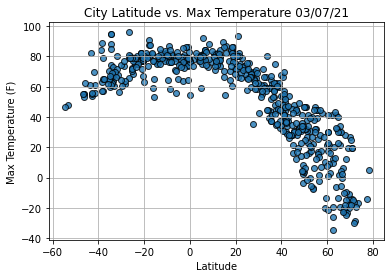

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

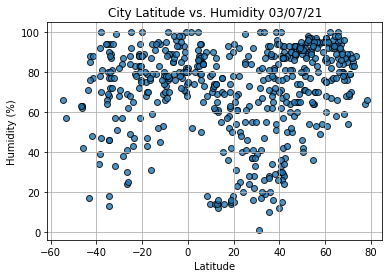

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

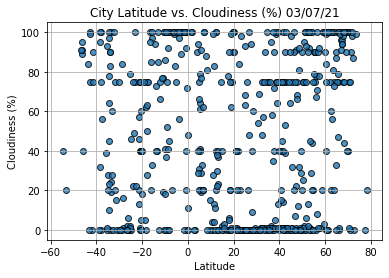

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

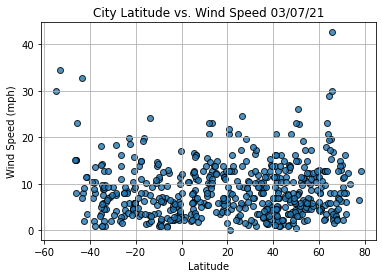

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2021-03-07 21:10:54
Lat                        -53.15
Lng                      -70.9167
Max Temp                     48.2
Humidity                       57
Cloudiness                     20
Wind Speed                  34.52
Name: 13, dtype: object

In [37]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
547     True
548     True
549     True
550     True
551     True
Name: Lat, Length: 552, dtype: bool

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bam,IR,2021-03-07 21:10:36,29.1060,58.3570,58.62,33,0,1.10
1,Buchanan,LR,2021-03-07 21:10:37,5.8808,-10.0467,78.80,94,20,6.93
3,Megion,RU,2021-03-07 21:10:40,61.0296,76.1136,3.20,92,0,4.47
4,Jadu,LY,2021-03-07 21:10:41,31.9530,12.0261,60.69,41,1,16.46
5,Khatanga,RU,2021-03-07 21:10:42,71.9667,102.5000,-28.98,85,87,7.90


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

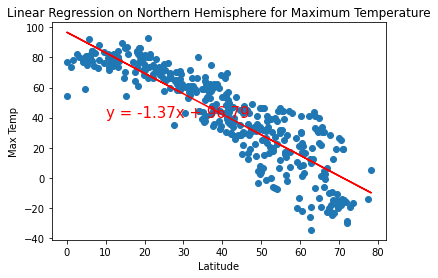

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Show title

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

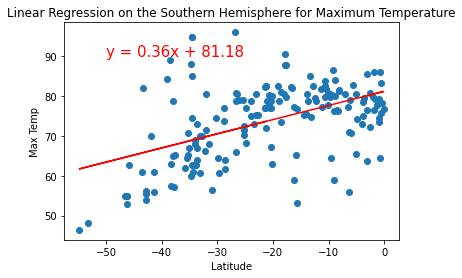

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

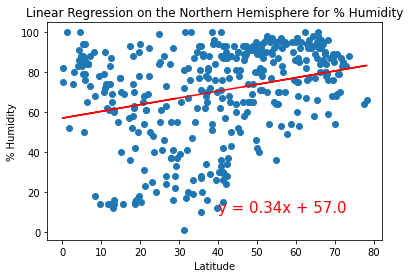

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

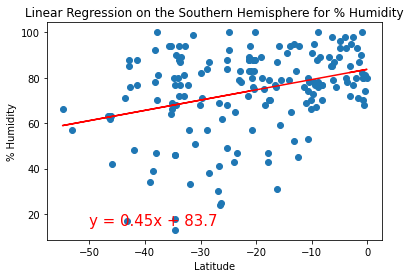

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

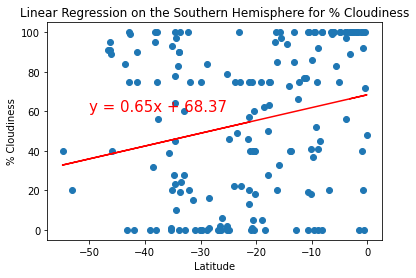

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

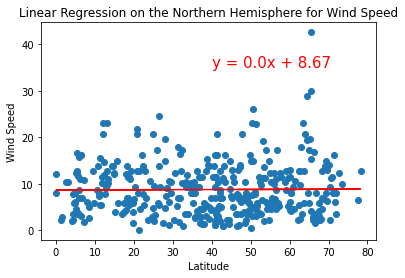

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

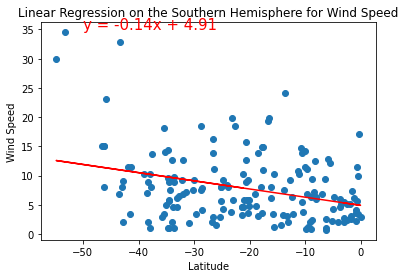

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))